In [7]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
%matplotlib inline

data = pd.read_json('data/train.json', '')
print('There is ', len(data['id']), ' samples.')
cuisine_map = list(set(data['cuisine']))
ingredient_list = data['ingredients']
print(len(cuisine_map))
ingredient_map = []
for ingredients in ingredient_list:
    ingredient_map += ingredients
    ingredient_map = list(set(ingredient_map))

There is  39774  samples.
20


In [8]:
print(len(ingredient_map))
for ingredient in ingredient_map:
    print(ingredient)

6714
candy
levain bread
runny honey
honey graham crackers
kefir
Nido Milk Powder
low sodium beef stock
crushed pineapple
european style butter
KRAFT Mexican Style Finely Shredded Four Cheese
vegetarian oyster sauce
cheese ravioli
madeira wine
pancit canton
frozen strawberries
KRAFT Reduced Fat Shredded Mozzarella Cheese
rub
prime rib
reduced sodium canned chicken broth
melted fat
whipped topping
fenugreek
genmai miso
suckling pig
toasted peanuts
smoked sea salt
sweet turkey sausage
andouille sausage links
guava paste
farina
miso sesame grilling sauce
sour cream
cream ic peach
apple pie spice
sliced chorizo
Grand Marnier
barley miso
herb cheese
caviar
trout
frozen banana leaf
San Marzano tomatoes
bitters
sauce tomato
steamed rice
skinless chicken fillets
game
teriyaki marinade
bone-in chicken
cajun style stewed tomatoes
rendered bacon fat
turkey ham
tomato purГ©e
pineapple
black cherries
tortillas
corn bread
pompano fillets
boar
black lentil
irish oats
brown rice
pepper sauce
peach sorb

imitation seafood
chuck
pink lentil
goat
frisee
shimeji mushrooms
whole wheat penne
Jose Cuervo Gold Tequila
ketjap
red vinegar
nonfat block cream cheese
chinese hot mustard
whole grain rice
frozen chopped spinach, thawed and squeezed dry
Spice Islands Ground Cumin Seed
orange bitters
whole crab
broccoli
Greek dressing
chicken legs
green cardamom pods
portobello caps
squash seeds
spearmint
sweet yellow corn
disco empanada frozen
french style sandwich rolls
cavatelli
wine vinegar
lo mein noodles
pastry
Johnsonville Smoked Sausage
pumpkin
boneless skinless chicken
powdered sugar icing
flower petals
green soybeans
less sodium fat free chicken broth
candy canes
brewed tea
oyster mushrooms
pineapple syrup
Tabasco Pepper Sauce
nonfat half-and-half
california avocado
alfalfa sprouts
Goya Extra Virgin Olive Oil
asafoetida powder
minced ginger
strawberry gelatin
sliced meat
whipping heavy cream
medium zucchini
polish sausage
chicken feet
napa cabbage leaves
sea scallops
yellow chives
rosewater


turnips
dairy free coconut ice cream
liquorice
dijon
mixed spice
crema mexican
pomegranate juice
bottled low sodium salsa
mushroom soup
red enchilada sauce
cured pork
porcini
bean paste
medium firm tofu
chipotle peppers
kidney beans
Argo Corn Starch
challa
unsweetened dried coconut
mild pork sausage
vegetable fats
veal for stew
rosГ© wine
taco seasoning mix
roti
veal bones
greek seasoning mix
dried coconut flakes
cornflake crumbs
low-fat pasta sauce
red bell pepper, sliced
ginger beer
almond filling
French bread loaves
mixed fruit
splenda granular
chocolate extract
grain alcohol
Melba toast
instant espresso powder
white almond bark
reduced fat mozzarella
smoked turkey breast
beef rump steaks
chocolate sauce
egg noodles, cooked and drained
canned chopped tomatoes
pozole
dried cornhusks
chinkiang vinegar
cake mix
croissant dough
ground paprika
kewra water
chocolate milk
Hidden ValleyВ® Original RanchВ® Dressing
bean curd skins
stevia
small yellow onion
dried kelp
kelp
miswa
cook egg hard

japanese style bread crumbs
udon
sweet soy sauce
BREAKSTONE'S Sour Cream
rice bran oil
egg yolks
gluten free cornmeal
rice flour
salmon
cantaloupe
jumbo macaroni shells
longan
habanero powder
tomato basil sauce
light rum
boiling onions
raspberry liqueur
crepes
low-fat flour tortillas
brown mushroom
lasagna noodles
vegetable broth
active dry yeast
nonpareils
rose water
chicken parts
tortilla shells
black treacle
fresh ginger root
pork rib chops
ragu cheesi doubl cheddar sauc
fresh orange
flax seed meal
cream powder
graham flour
knorr pasta side
Neapolitan ice cream
cilantro leaves
icing
pineapple chunks
dried dillweed
asian barbecue sauce
roasted unsalted cashews
pancit
smoked salmon
Vietnamese coriander
frozen carrots
filet mignon steaks
snip fresh dill
rice vinegar
brioche bread
stone ground mustard
cassava meal
chopped green bell pepper
linguine
2 1/2 to 3 lb. chicken, cut into serving pieces
Nestle Table Cream
grated pecorino
roquefort cheese
veal cutlets
opo squash
converted rice
v

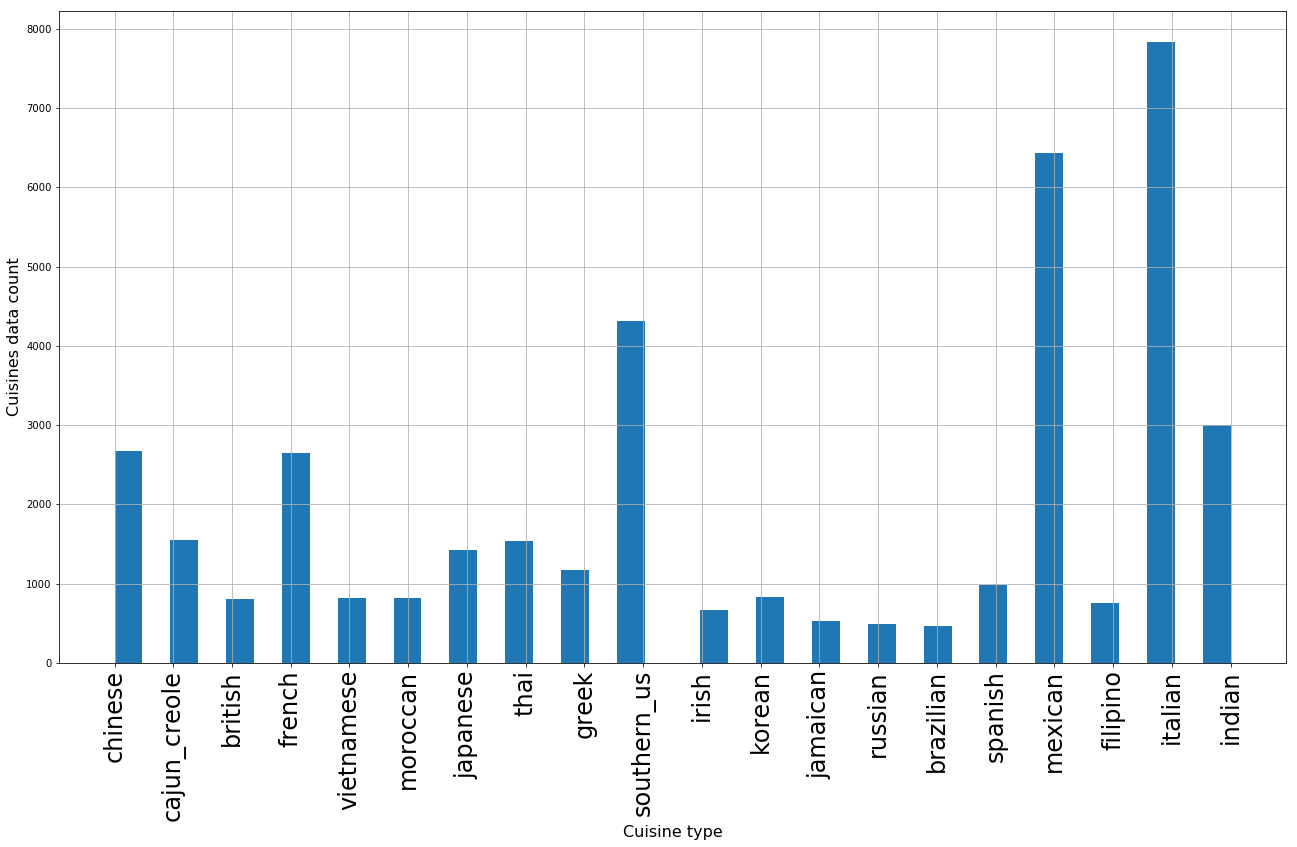

In [9]:
plt.figure(figsize=(22, 12))

plt.xlabel("Cuisine type", fontsize=16)  
plt.ylabel("Cuisines data count", fontsize=16)
cuisine_list = data['cuisine'].map(lambda x: cuisine_map.index(x))
cuisine_list.hist(bins=40)

x = np.array(range(20))
my_xticks = cuisine_map
plt.xticks(x, my_xticks)
plt.xticks(rotation=90)
plt.xticks(fontsize=24)
plt.show()

In [15]:
from collections import defaultdict
ingredient_cuisine = defaultdict(set)
for item in range(len(data['id'])):
    for ingredient in data['ingredients'][item]:
        ingredient_cuisine[ingredient].add(data['cuisine'][item])
            


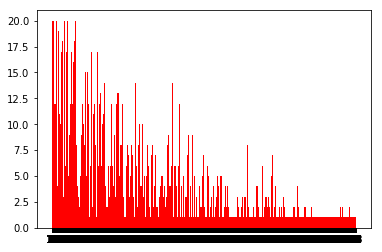

In [11]:
ingredient_frequency = np.array([len(cuisines) for (ingredient, cuisines) in ingredient_cuisine.items()])
alphab = np.array([len(ingredient) for (ingredient, cuisines) in ingredient_cuisine.items()])
frequencies = ingredient_frequency
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, frequencies, width, color='r')
plt.show()

In [12]:
pd.Series(ingredient_frequency).describe()

count    6714.000000
mean        4.345993
std         4.730157
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        20.000000
dtype: float64

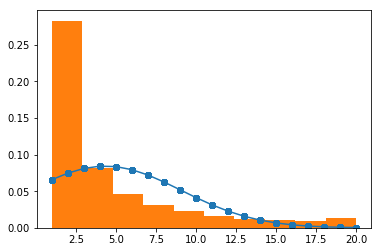

In [13]:
import scipy.stats as stats
import pylab as pl

h = sorted(ingredient_frequency)

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      

pl.show()

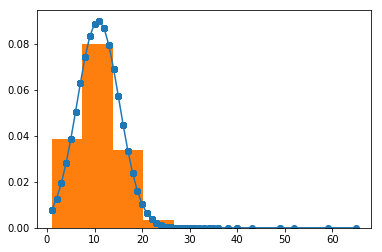

In [14]:

ingredient_size_frq = [len(ingredients) for ingredients in data['ingredients']]
h = sorted(ingredient_size_frq)

fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      

pl.show()